<a href="https://colab.research.google.com/github/caiommoreno/airbnb_analysis/blob/main/Analysing_Airbnb_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Airbnb Data Analysis - Athens

<center>
<img alt="Athens" width="80%" src="https://images.unsplash.com/photo-1557686583-560ae7baba2a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=751&q=80">

*Photo by [
Stavrialena Gontzou](https://unsplash.com/@stavrialena) in [Unsplash](https://unsplash.com/)*
</center>

[Airbnb](https://www.airbnb.com.br/) it's already considered the **biggest hospitality company in the world**. Oh, and the most curious thing it's **they don't have any hotel**!

Connecting people who want to travel (and stay) with hosts who want to rent their own properties in a practical way, Airbnb offers their innovative platform to make this alternative host model come into reality.

At the end of 2018, the Startup was founded at 10 years ago, had already **hosted over 300 million people around the world**, challenging traditional hotel chains.

One of the Airbnb goals it's to provide data from their website, to one of the main countries of the world. On the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) it's possible to download a big amount of data to develop Data Science projects and solutions.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**At this article, we're gonna analyze the Athens data, and see what insights can be extracted from the raw data.**


## Collecting data

The data from here were obtained from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For a initial analysis, only the following file was downloaded from the website above:

* *listings.csv - Summary information and metrics for listings in Athens (good for visualizations)*

In [1]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# import listings.csv to a pandas DataFrame
df = pd.read_csv("http://data.insideairbnb.com/greece/attica/athens/2020-04-21/visualisations/listings.csv")


# Analysing data

At this step, the goal is to create a initial situational awareness to allow an understanding of how the data is structured.

**Dicionário das variáveis**

* `id` - number of id generated to identify the immobile;
* `name` - advertised property name;
* `host_id` - hosts id number of the property;
* `host_name` - name of the host;
* `neighbourhood_group` - no valid values on that variable;
* `neighbourhood` - neighborhood  name/
* `latitude` - latitude;
* `longitude` - longitude;
* `room_type` - type of room;
* `price` - rent price;
* `minimum_nights` - minimum nights for reservation;
* `number_of_reviews` - property number of reviews;
* `last_review` - date from the last review;
* `reviews_per_month` - number of reviews per month;
* `calculated_host_listings_count` - number of properties from the same person;
* `availability_365` - number of days of availability within 365 days;

Before initialize any analysis, let's verify how our dataset is available, showing only his first 5 inputs.


In [3]:
# show only the first 5 inputs
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,111,1,25,2020-03-15,0.23,6,356
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,47,1,34,2020-01-08,0.37,6,335
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,40,1,48,2020-01-17,0.52,6,347
3,10995,"47m2, close to metro,cable TV,wi-fi",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,42,1,20,2020-02-23,0.17,6,324
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,47,1,17,2020-01-08,0.18,6,304


## **Q1. How many variables and how many inputs our dataset has? What is the variables?**

Let's observe the number of inputs and what type has every column on the data.

This is a resumed version of the dataset. At the same page, has the csv file named "listings.csv.gz" — a completed version with 106 variables.

In [4]:
# identify the volue of data of the DataFrame

print("Inputs:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

# display the type of every data
display(df.dtypes)

Inputs:	 11532
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Q2. What is the percentage of the missing values on this dataset?**

The quality of a dataset it's directly relationed with the number of missing values. It's important to understand in the beginning if these nulls values are significant compared to the total.

* It's possible to see the ```neighbourhood_group``` column has 100% of their values **missing**
* ```reviews_pe_month``` and ```last_review``` has null values in almost half of the lines.
* ```name``` and ```host_name``` variables has approximately 0,1% of their values null.

In [5]:
# ordening in descending order the variables as their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.224072
last_review                       0.224072
name                              0.000607
host_name                         0.000087
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## **Q3. What is the type of the distribution of these variables?**

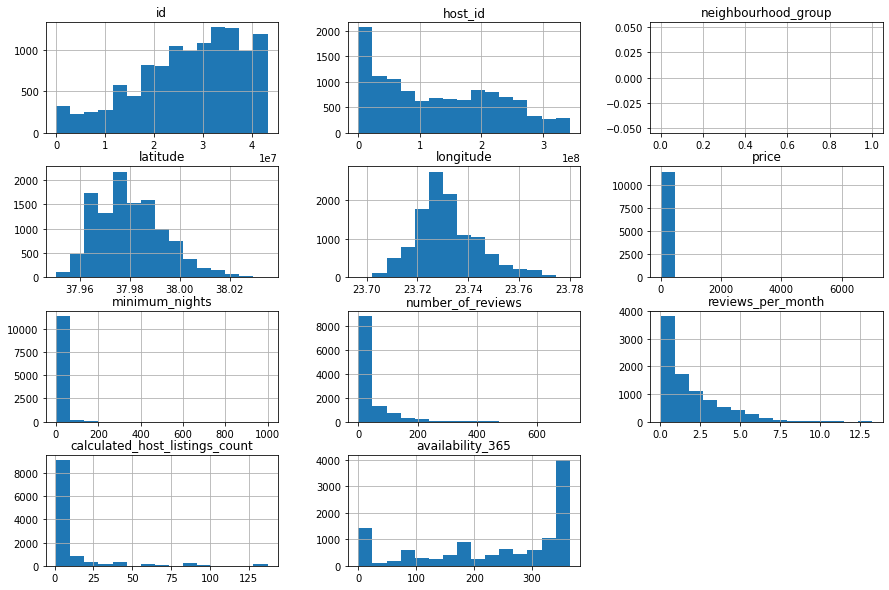

In [7]:
# plot the histogram from the numerical variables
df.hist(bins = 15, figsize=(15,10));

### **Q3.1 Has some outlier  — a data point that differs significantly from other observations — on the values?**

Observing the histogram distribution, it's possible to verify evidence of outliers. Look for example the variables ```price```, ```minimum_nights```, and ```calculated_host_listings_count```.

Their values don't follow a distribution, and distort all the graphic representation. To confirm it, has two easiest ways to assist the outlier detection. They are: 

* Statistical resume by the ```describe()``` Python method;
* Plot some ```boxplots``` to the variable.


### **Q3.2 What is the average rental price?**

In [8]:
# see the average values from the `price` column
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11532.000000,11532.000000,11532.000000,8948.000000,11532.000000,11532.000000
mean,67.102324,3.814083,35.631287,1.826676,10.988727,238.472251
std,152.166856,19.703644,61.172109,1.863259,22.949501,127.190871
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,34.000000,1.000000,1.000000,0.410000,1.000000,148.000000
50%,48.000000,2.000000,9.000000,1.150000,2.000000,282.000000
75%,70.000000,2.000000,43.000000,2.690000,8.000000,355.000000
max,7000.000000,1000.000000,711.000000,13.250000,137.000000,365.000000


Observing the statistical resume above, we can confirm some hypotheses:

* The ```price``` variable has 75% of his value under 70, but his maximum value it's 7000.
* The minimum quantity of nights (```minimum_nights```) it's over 365 days a year.

###**Boxplot for minimum_nights and price**

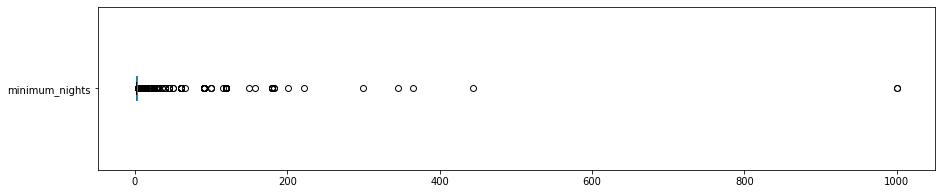

minimum_nights - values above 30:
160 inputs
1.3874%


In [11]:
#minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# show the values above 30 days for minimum_nights
print("minimum_nights - values above 30:")
print("{} inputs".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format(len(df[df.minimum_nights > 30])/ df.shape[0]*100))

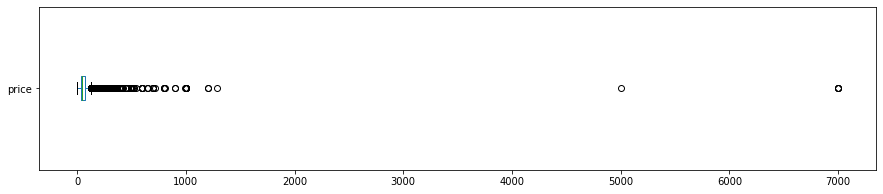

price: valores acima de 250:
205 entradas
1.7777%


In [12]:
#price
df.price.plot(kind = 'box', vert = False, figsize = (15,3))
plt.show()

# show the values above 250 dolars for price
print("price: valores acima de 250:")
print("{} entradas".format(len(df[df.price > 250])))
print("{:.4f}%".format(len(df[df.price > 250])/ df.shape[0]*100))

### Histogram without outliers
As we can see, the presence of outliers are explicit at ```price``` and ```minimum_nights``` in the analysis above.

Now, let's clean the DataFrame of these variables, and plot again the histogram to see the impact on the visualization results.

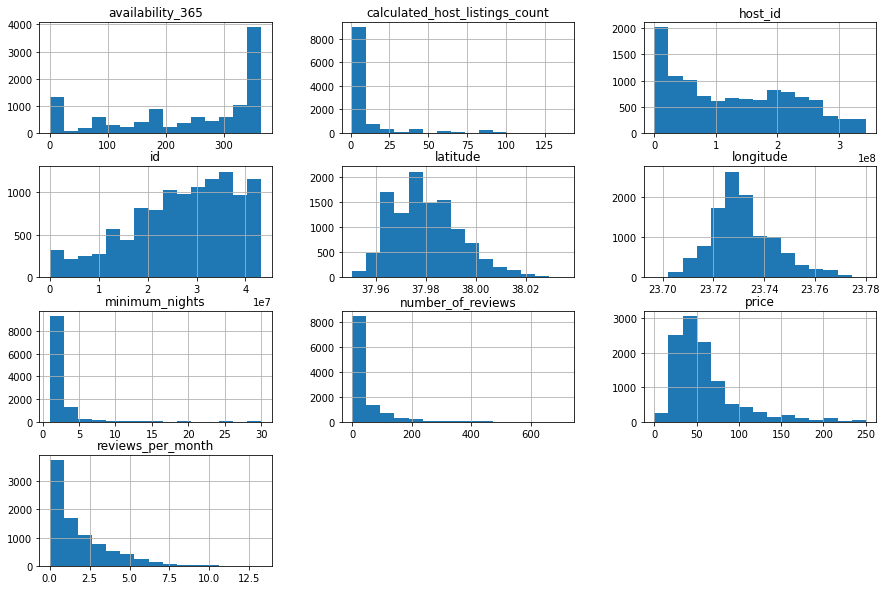

In [ ]:
# removing the  *outliers* in a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 250].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

#removing 'neighbourhood_group', because it's empty
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

#plot the histogram just for the numeric variables
df_clean.hist(bins = 15, figsize = (15,10));



## **Q4. What is the correlation between the variables?**

Correlation or dependence is any statistical relationship, whether causal or not, between two random variables. In this context, we are searching relationship or similarity between two variables.

This relationship can be measured, and it is the function of the correlation coefficient to establish how big is that difference. To visualize this coefficient, we will:

* Create a correlation matrix;
* Create a heatmap with the matrix values, using the ```seaborn``` library.


In [ ]:
# correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                   'calculated_host_listings_count', 'availability_365']].corr()

# show the correlation matrix
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.085590,-0.114108,-0.100072,0.159241,0.138804
minimum_nights,-0.085590,1.000000,-0.064634,-0.107972,-0.088595,-0.046934
number_of_reviews,-0.114108,-0.064634,1.000000,0.754156,-0.051347,0.044287
reviews_per_month,-0.100072,-0.107972,0.754156,1.000000,-0.063009,0.043060
calculated_host_listings_count,0.159241,-0.088595,-0.051347,-0.063009,1.000000,0.136414
availability_365,0.138804,-0.046934,0.044287,0.043060,0.136414,1.000000


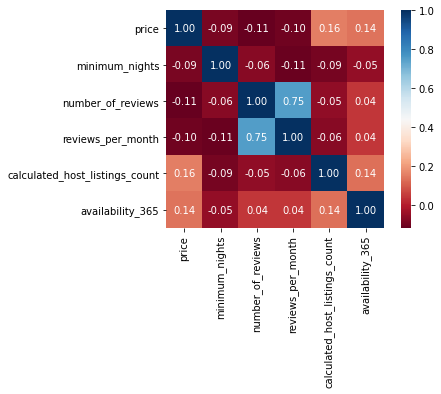

In [ ]:
# plot the heatmap of the correlation matrix
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True)


## **Q5. What is the most rented property on Airbnb?**

The ```room_type``` variable column indicates the type of rental is advertised on Airbnb. If you already rented on this website, you should know that are a few options of apartments/entire houses, just renting a single room, or sharing room with another people.

Let's count the number of occurrences of each type of rental, using the ```value_counts()``` method.


In [ ]:
# show the quantity of each type of immobile availabe
df_clean.room_type.value_counts()


Entire home/apt    9864
Private room       1009
Hotel room          215
Shared room          81
Name: room_type, dtype: int64

In [ ]:
# show the percentage of each type of immobile available
df_clean.room_type.value_counts() / df_clean.shape[0]*100


Entire home/apt    88.315874
Private room        9.033933
Hotel room          1.924971
Shared room         0.725222
Name: room_type, dtype: float64

## **Q6. What is the most expensive location on Athens?**



In [ ]:
# show the average prices per neighbourhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
ΡΗΓΙΛΛΗΣ                  93.750000
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    78.635091
ΚΟΛΩΝΑΚΙ                  74.182990
ΘΗΣΕΙΟ                    73.567308
ΚΕΡΑΜΕΙΚΟΣ                72.832765
ΖΑΠΠΕΙΟ                   72.828571
ΑΚΡΟΠΟΛΗ                  71.084469
ΛΥΚΑΒΗΤΤΟΣ                68.546154
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ       62.467890
ΙΛΙΣΙΑ                    61.880597
Name: price, dtype: float64

Above, we see that neighbourhood ΡΗΓΙΛΛΗΣ, ΕΜΠΟΡΙΚΟ, ΤΡΙΓΩΝΟ-ΠΛΑΚΑ, ΚΟΛΩΝΑΚΙ have an average price higher than other places

A person who does not know Athens could present these results without question. Just to give a single example how that example could not be representative, see how many entrys are for ΡΗΓΙΛΛΗΣ (the most expensive location).


In [ ]:
# number of immobiles in ΡΗΓΙΛΛΗΣ
print(df_clean[df_clean.neighbourhood == "ΡΗΓΙΛΛΗΣ"].shape)

#show all entrys at ΡΗΓΙΛΛΗΣ
df_clean[df_clean.neighbourhood == "ΡΗΓΙΛΛΗΣ"]

(12, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
716,7572379,Central Kolonaki - Athenian Oasis.,39701255,Sissy,ΡΗΓΙΛΛΗΣ,37.97414,23.74165,Entire home/apt,75,2,57,2019-09-17,1.04,5,254
884,9536776,Kolonaki - Syntagma penthouse with sea view,33425468,Irini,ΡΗΓΙΛΛΗΣ,37.97414,23.74165,Entire home/apt,75,2,5,2018-04-02,0.10,5,254
904,9746382,Luxurious 5 star apartment,50200343,Georgios,ΡΗΓΙΛΛΗΣ,37.97470,23.74141,Entire home/apt,126,1,0,NaN,NaN,1,365
935,10063292,Cosy apartment in Athens-next to Syntagma Square,39701255,Sissy,ΡΗΓΙΛΛΗΣ,37.97445,23.74114,Entire home/apt,65,2,19,2019-08-30,0.37,5,254
937,10064490,Luxury apartment Athens-next to Syntagma Square,33425468,Irini,ΡΗΓΙΛΛΗΣ,37.97414,23.74165,Entire home/apt,65,2,27,2018-09-12,0.53,5,254
2668,19292810,"THE CACTI HOUSE, 75 m2, by the National Gardens",44817573,Alexandra,ΡΗΓΙΛΛΗΣ,37.97380,23.74189,Entire home/apt,60,2,26,2020-01-04,0.84,1,365
3830,23417733,Athenian,52520644,Maddie,ΡΗΓΙΛΛΗΣ,37.97540,23.74180,Entire home/apt,115,2,4,2019-08-12,0.16,1,0
4516,25220364,Kolonaki Plaza chic apartment,54443805,Housefull,ΡΗΓΙΛΛΗΣ,37.97527,23.74164,Entire home/apt,65,2,5,2019-12-09,0.22,13,206
8637,35701324,The Yellow Submarine in Kolonaki by JJ Hospita...,55670751,Jj,ΡΗΓΙΛΛΗΣ,37.97433,23.74171,Entire home/apt,93,1,8,2020-02-17,1.05,38,184
8853,36218337,Kolonaki 200sqm apartment,272404198,Vanessa,ΡΗΓΙΛΛΗΣ,37.97296,23.74236,Entire home/apt,200,9,0,NaN,NaN,1,0


As we can see, has just 15 properties with that price inside a database with 10 thousand entrys, distorting all the analysis. This is what outliers are capable to do.


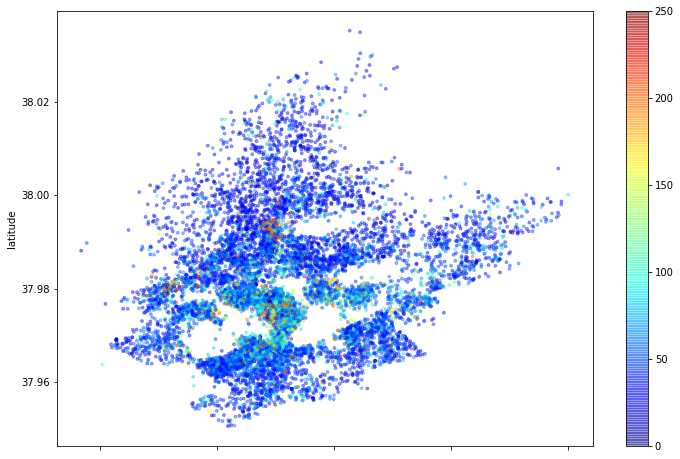

In [ ]:
# plot the immobiles by latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusions



It was made a simply and superficial analysis on the Airbnb database. As we can see, we have some outliers on the raw database.

In some locations, it's explicit that we have few properties available, distorting the statistical values of some attributes.

Remembering that is a resumed dataset version, perfect for an initial approach.

This is a clear example where data analysis, and understanding the power of a data-driven mindset can be crucial in decision-making when making an everyday decision - choosing a house to rent -, more important information, such as the variables of a company or business.
